# Resultados

Ajustamos os modelos definidos e calculamos a métrica da competição para facilitar a comparação com os modelos dos colegas de classe.

### Bibliotecas Necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import math

### Carregar os dados

In [2]:
data_coupon1 = pd.read_csv('data/data_coupon1.csv', sep='|').set_index('Unnamed: 0')
data_coupon2 = pd.read_csv('data/data_coupon2.csv', sep='|').set_index('Unnamed: 0')
data_coupon3 = pd.read_csv('data/data_coupon3.csv', sep='|').set_index('Unnamed: 0')
y_basket = pd.read_csv('data/DMC_2015_orders_train.txt', sep='|')['basketValue']

In [3]:
data = data_coupon1.merge(data_coupon2, on=['orderTime', 'couponsReceived'])
data = data.merge(data_coupon3, on=['orderTime', 'couponsReceived'])

X = data.copy()
del X['coupon1Used']
del X['coupon2Used']
del X['coupon3Used']

In [4]:
y_coupon1 = data['coupon1Used']
y_coupon2 = data['coupon2Used']
y_coupon3 = data['coupon3Used']

### Modelos Selecionados

In [5]:
knnCoupon1 = KNeighborsClassifier(n_neighbors=35, n_jobs=-1)
knnCoupon2 = KNeighborsClassifier(n_neighbors=51, n_jobs=-1)
knnCoupon3 = KNeighborsClassifier(n_neighbors=41, n_jobs=-1)
knnBasket = KNeighborsRegressor(n_neighbors=101, n_jobs=-1)

In [6]:
knnCoupon1.fit(X, y_coupon1)
knnCoupon2.fit(X, y_coupon2)
knnCoupon3.fit(X, y_coupon3)
knnBasket.fit(X, y_basket)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
          weights='uniform')

### Tratamento dos dados da competição

In [7]:
data_class = pd.read_csv('data/DMC_2015_orders_class.txt', sep='|')

In [8]:
del data_class['userID']
del data_class['orderID']
del data_class['couponID1']
del data_class['couponID2']
del data_class['couponID3']
data_class['orderTime'] = pd.DatetimeIndex(data_class['orderTime']).astype('int')
data_class['couponsReceived'] = pd.DatetimeIndex(data_class['couponsReceived']).astype('int')

In [9]:
data_class_coupon1 = data_class.copy()
data_class_coupon2 = data_class.copy()
data_class_coupon3 = data_class.copy()

In [10]:
data_class_coupon1 = data_class_coupon1.loc[:,[(x[-1] != '2' and x[-1] != '3') for x in data_class_coupon1.columns]].iloc[:,:-3]

data_class_coupon2 = data_class_coupon2.loc[:,[(x[-1] != '1' and x[-1] != '3') for x in data_class_coupon2.columns]].iloc[:,:-2]
del data_class_coupon2['coupon1Used']

data_class_coupon3 = data_class_coupon3.loc[:,[(x[-1] != '1' and x[-1] != '2') for x in data_class_coupon3.columns]].iloc[:,:-1]
del data_class_coupon3['coupon1Used']
del data_class_coupon3['coupon2Used']

In [11]:
data_class_coupon1 = pd.get_dummies(data_class_coupon1, columns=["brand1", "productGroup1"])
data_class_coupon2 = pd.get_dummies(data_class_coupon2, columns=["brand2", "productGroup2"])
data_class_coupon3 = pd.get_dummies(data_class_coupon3, columns=["brand3", "productGroup3"])

In [12]:
vetor1 = [d.split(',') for d in data_class_coupon1['categoryIDs1']]
categoryIDs1 = set(x for l in vetor1 for x in l)
vetor2 = [d.split(',') for d in data_class_coupon2['categoryIDs2']]
categoryIDs2 = set(x for l in vetor2 for x in l)
vetor3 = [d.split(',') for d in data_class_coupon3['categoryIDs3']]
categoryIDs3 = set(x for l in vetor3 for x in l)

In [13]:
d1 = dict()
for c in categoryIDs1:
    d1['categoryIDs1_'+c] = []
for i in vetor1:
    for c in categoryIDs1:
        if c in i:
            d1['categoryIDs1_'+c].append(1.0)
        else:
            d1['categoryIDs1_'+c].append(0)
            
d2 = dict()
for c in categoryIDs2:
    d2['categoryIDs2_'+c] = []
for i in vetor2:
    for c in categoryIDs2:
        if c in i:
            d2['categoryIDs2_'+c].append(1.0)
        else:
            d2['categoryIDs2_'+c].append(0)     
            
d3 = dict()
for c in categoryIDs3:
    d3['categoryIDs3_'+c] = []
for i in vetor3:
    for c in categoryIDs3:
        if c in i:
            d3['categoryIDs3_'+c].append(1.0)
        else:
            d3['categoryIDs3_'+c].append(0)     

In [14]:
data_class_coupon1 = data_class_coupon1.join(pd.DataFrame(d1))
del data_class_coupon1['categoryIDs1']
data_class_coupon2 = data_class_coupon2.join(pd.DataFrame(d2))
del data_class_coupon2['categoryIDs2']
data_class_coupon3 = data_class_coupon3.join(pd.DataFrame(d3))
del data_class_coupon3['categoryIDs3']

In [15]:
data_class_coupon1.fillna(data_class_coupon1.mean())
data_class_coupon2.fillna(data_class_coupon2.mean())
data_class_coupon3.fillna(data_class_coupon3.mean())

def normalize(df):
    return (df - df.min())/(df.max() - df.min())

data_class_coupon1 = normalize(data_class_coupon1)
data_class_coupon2 = normalize(data_class_coupon2)
data_class_coupon3 = normalize(data_class_coupon3)

In [16]:
data_c_s = data_class_coupon1.merge(data_class_coupon2, on=['orderTime', 'couponsReceived'])
data_c_s = data_c_s.merge(data_class_coupon3, on=['orderTime', 'couponsReceived'])

X_class = data_c_s.copy()

In [17]:
del X_class['coupon1Used']
del X_class['coupon2Used']
del X_class['coupon3Used']


In [18]:
col_to_delete = [c for c in X.columns if 'category' in c]
for c in col_to_delete:
    del X[c]

In [19]:
col_to_delete = [c for c in X_class.columns if 'category' in c]
for c in col_to_delete:
    del X_class[c]

### Treinamento dos modelos na base da competição

In [34]:
knnCoupon1.fit(X, y_coupon1)
knnCoupon2.fit(X, y_coupon2)
knnCoupon3.fit(X, y_coupon3)
knnBasket.fit(X, y_basket)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
          weights='uniform')

In [21]:
train_brands = [c for c in X.columns if 'brand' in c]
class_brands = [c for c in X_class.columns if 'brand' in c]

In [22]:
different_brands = [c for c in train_brands if c not in class_brands]

In [23]:
for c in different_brands:
    del X[c]

In [24]:
different_brands = [c for c in class_brands if c not in train_brands]

In [25]:
for c in different_brands:
    del X_class[c]

In [26]:
class_groups = [c for c in X_class.columns if 'Group' in c]

In [27]:
train_groups = [c for c in X.columns if 'Group' in c]

In [28]:
different_groups = [c for c in train_groups if c not in class_groups]
for g in different_groups:
    del X[g]

In [29]:
different_groups = [c for c in class_groups if c not in train_groups]
for g in different_groups:
    del X_class[g]

### Previsões e cálculo da métrica da competição

In [ ]:
knnCoupon1.fit(X, y_coupon1)
knnCoupon2.fit(X, y_coupon2)
knnCoupon3.fit(X, y_coupon3)
knnBasket.fit(X, y_basket)

In [35]:
predicted_coupon1 = knnCoupon1.predict(X_class)
predicted_coupon2 = knnCoupon2.predict(X_class)
predicted_coupon3 = knnCoupon3.predict(X_class)
predicted_basket = knnBasket.predict(X_class)

In [36]:
results = pd.read_csv('data/DMC_2015_realclass.txt', sep='|')

In [69]:
def E(pre_c1, pre_c2, pre_c3, pre_basket, real_c1, real_c2, real_c3, real_basket):
    c1 = []
    c2 = []
    c3 = []
    basket = []
    for i in range(0, len(pre_c1)):
        c1.append(math.pow(math.fabs(real_c1[i]-pre_c1[i])/(sum(real_c1)/len(real_c1)), 2))
        c2.append(math.pow(math.fabs(real_c2[i]-pre_c2[i])/(sum(real_c2)/len(real_c2)), 2))
        c3.append(math.pow(math.fabs(real_c3[i]-pre_c3[i])/(sum(real_c3)/len(real_c3)), 2))
        basket.append(math.pow(math.fabs(real_basket[i]-pre_basket[i])/(sum(real_basket)/len(real_basket)), 2))
        
    return (sum(c1),sum(c2),sum(c3),sum(basket),sum(c1+c2+c3+basket))

In [70]:
E(predicted_coupon1, predicted_coupon2, predicted_coupon3, predicted_basket, results['coupon1Used'], results['coupon2Used'], results['coupon3Used'], results['basketValue'])

(3496.3535247070545,
 4262.485714285724,
 5264.711600865334,
 2112.6869693816966,
 15136.2378092399)

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [51]:
metrics.roc_auc_score(results['coupon1Used'], predicted_coupon1)

0.5069515065229393

In [49]:
roc_auc = roc_auc_score(y_true, y_scores)
roc_auc

nan

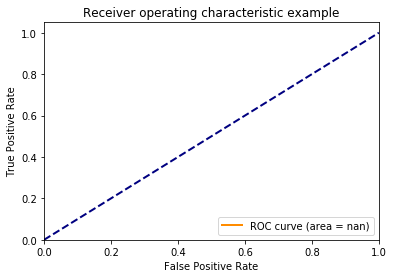

In [48]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [59]:
metrics.roc_auc_score(predicted_coupon2, results['coupon2Used'])

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [53]:
metrics.roc_auc_score(results['coupon3Used'], predicted_coupon3)

0.49914236706689535

In [54]:
metrics.roc_auc_score(results['basketValue'], predicted_basket)

ValueError: continuous format is not supported

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(results['coupon1Used'], predicted_coupon1, pos_label=2)

C:\Users\UNIVASF\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [62]:
metrics.auc(fpr, tpr)

nan

In [63]:
results["coupon1Used"]

0      1
1      1
2      1
3      0
4      0
5      1
6      1
7      1
8      0
9      1
10     1
11     0
12     0
13     0
14     1
15     1
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     0
24     0
25     1
26     0
27     0
28     0
29     0
      ..
639    0
640    0
641    0
642    0
643    0
644    0
645    0
646    0
647    0
648    0
649    0
650    0
651    0
652    0
653    0
654    0
655    1
656    0
657    1
658    0
659    0
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    1
668    0
Name: coupon1Used, Length: 669, dtype: int64

In [64]:
predicted_coupon1

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0